# Decision Trees
#### A model that makes decisions by asking a series of simple questions, like a flowchart.

A decision tree is a supervised learning algorithm used for both classification and regression tasks. It has a hierarchical tree structure which consists of a root node, branches, internal nodes and leaf nodes. 

    Internal nodes represent attribute tests 
    Branches represent attribute values 
    Leaf nodes represent final decisions or predictions.

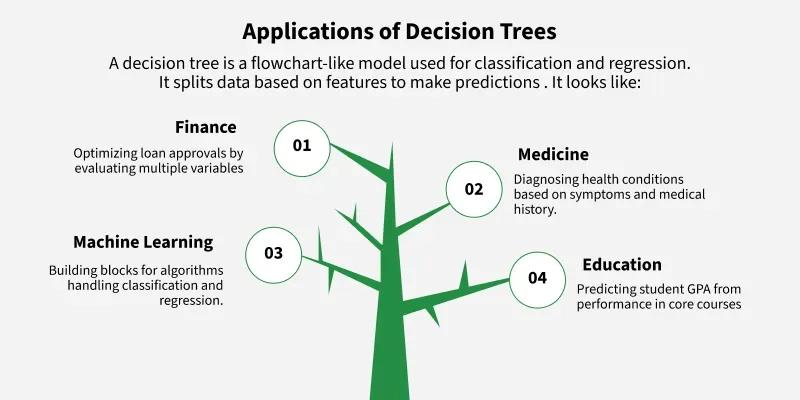

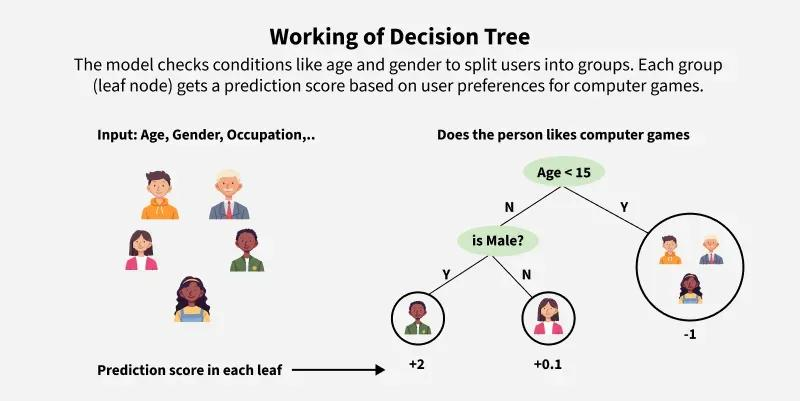

How Does a Decision Tree Work?
A decision tree splits the dataset based on feature values to create pure subsets ideally all items in 
a group belong to the same class. Each leaf node of the tree corresponds to a class label and 
the internal nodes are feature-based decision points. 

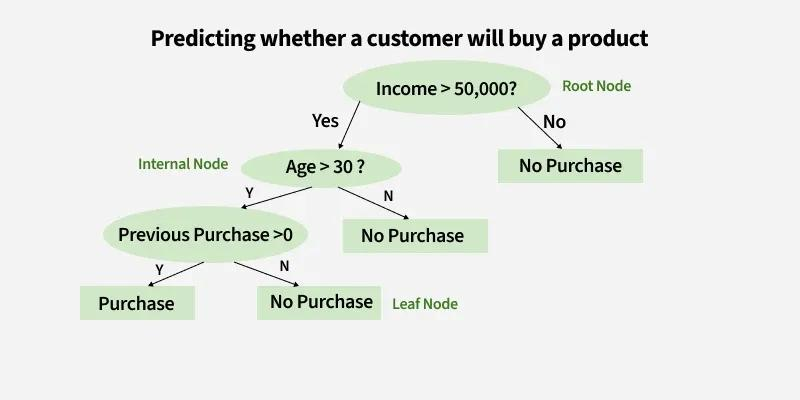

Implementing Decision Tree Regression using Scikit-Learn

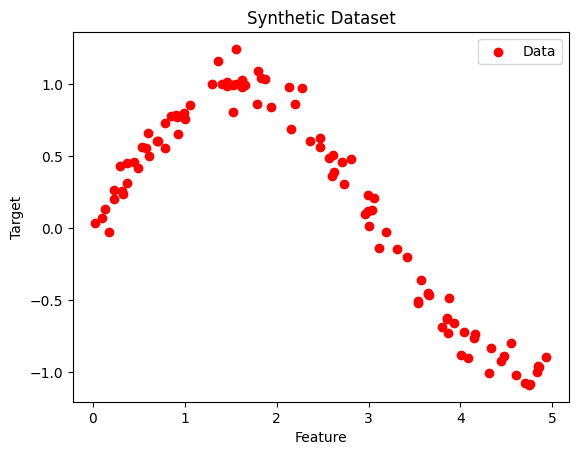

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

plt.scatter(X, y, color='red', label='Data')
plt.title("Synthetic Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
regressor = DecisionTreeRegressor(max_depth=4, random_state=42)

In [4]:
regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [5]:
y_pred = regressor.predict(X_test)

In [6]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0151


C:\Users\Mo\AppData\Local\Temp\ipykernel_21432\3277648091.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]


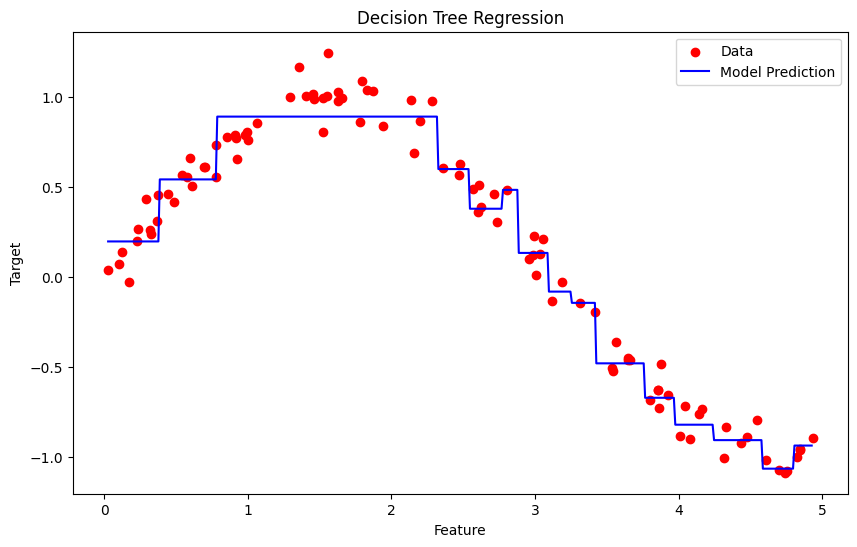

In [7]:
X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]
y_grid_pred = regressor.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Data')
plt.plot(X_grid, y_grid_pred, color='blue', label='Model Prediction')
plt.title("Decision Tree Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

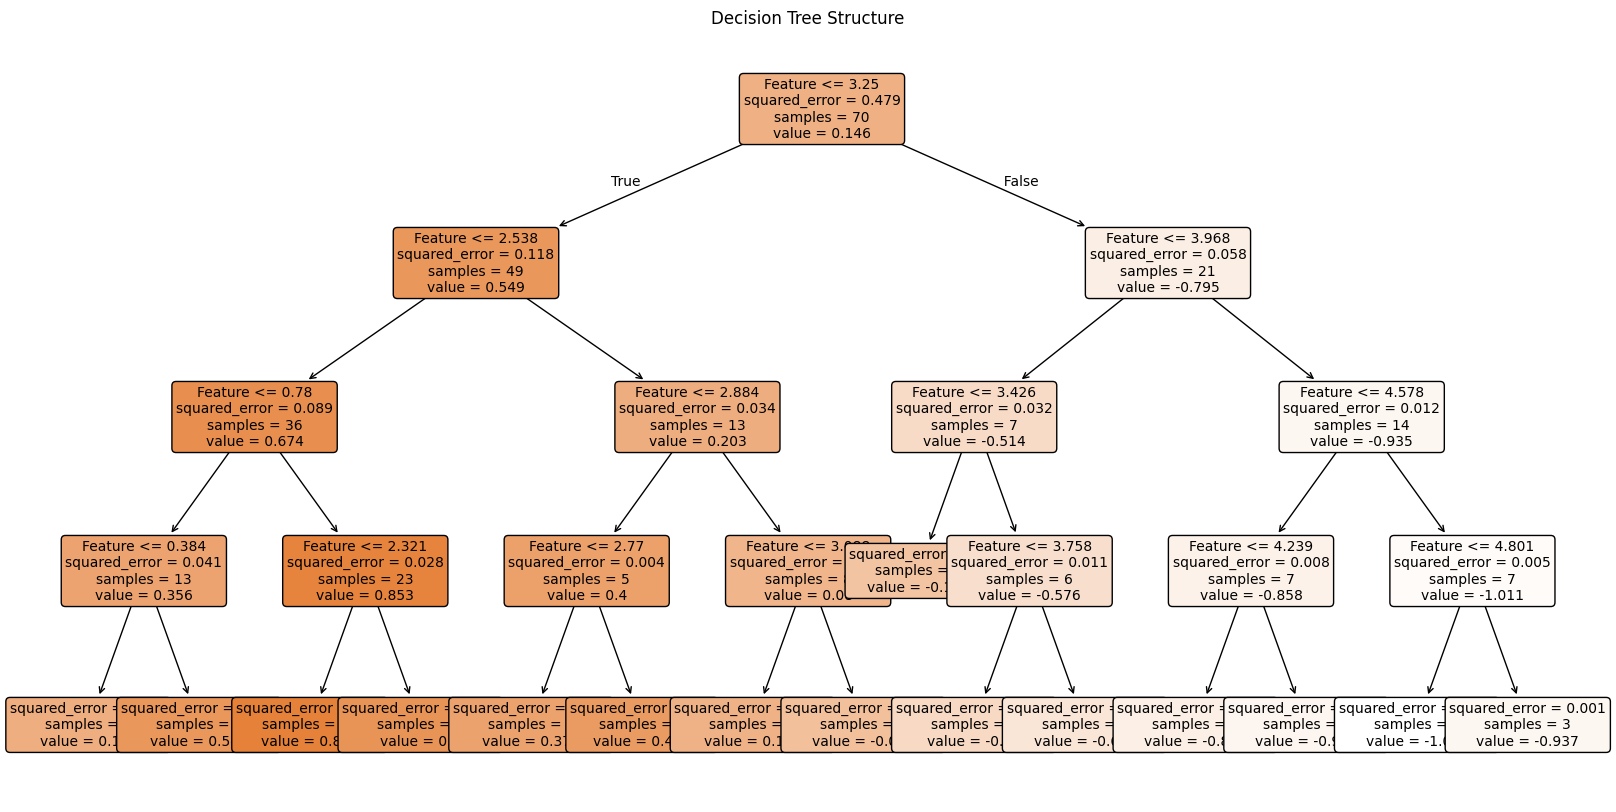

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    regressor,
    feature_names=["Feature"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()

Implementing Decision Tree Classifiers with Scikit-Learn

Parameters:

    criterion: It measure the quality of a split. Supported values are 'gini', 'entropy' and 'log_loss'. The default value is 'gini'
    splitter: This parameter is used to choose the split at each node. Supported values are 'best' & 'random'. The default value is 'best'
    max_features: It defines the number of features to consider when looking for the best split.
    max_depth: This parameter denotes maximum depth of the tree (default=None).
    min_samples_split: It defines the minimum number of samples reqd. to split an internal node (default=2).
    min_samples_leaf: The minimum number of samples required to be at a leaf node (default=1)
    max_leaf_nodes: It defines the maximum number of possible leaf nodes. 
    min_impurity_split: It defines the threshold for early stopping tree growth.
    class_weight: It defines the weights associated with classes.
    ccp_alpha: It is a complexity parameter used for minimal cost-complexity pruning

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [10]:
data = load_iris()
X = data.data  
y = data.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 99)

In [12]:
clf = DecisionTreeClassifier(random_state=1)

In [13]:
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
y_pred = clf.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9555555555555556


In [16]:
y_pred = clf.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9555555555555556


Hyperparameter Tuning with Decision Tree Classifier using GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

In [20]:
tree = DecisionTreeClassifier(random_state=1)

In [21]:
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           cv=5, verbose=True)

In [22]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'criterion': ['entropy', 'gini'], 'max_depth': range(1, 10), 'min_samples_leaf': range(1, 20, 2), 'min_samples_split': range(2, 20, 2)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [23]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=1)


In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [25]:
tree_clf = grid_search.best_estimator_

In [27]:
plt.figure(figsize=(18, 15))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names,
          class_names=iris.target_names)
plt.show()

NameError: name 'iris' is not defined

<Figure size 1800x1500 with 0 Axes>